In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import calendar

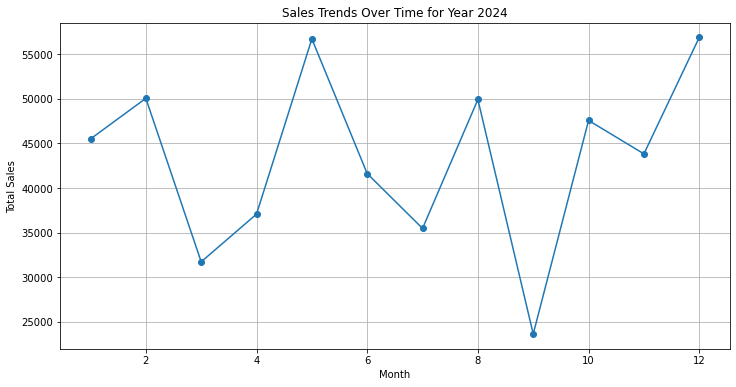

In [3]:
#EDA Steps:

data = pd.read_csv("dataset2.csv")

# Aggregate sales by date
sales_over_time = data.groupby('Month')['Total Amount'].sum()

# Line plot of sales trends
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time, marker='o')
plt.title('Sales Trends Over Time for Year 2024')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


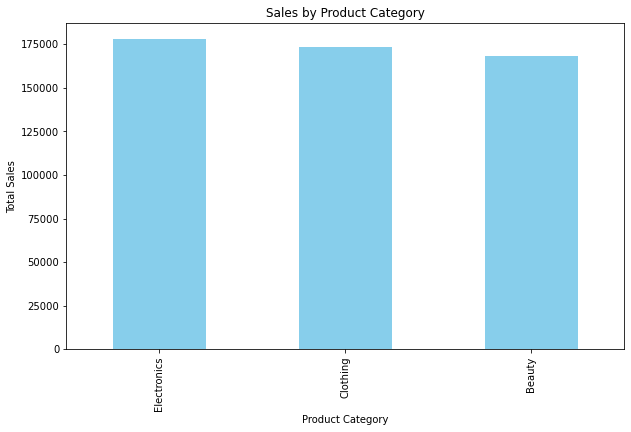

In [4]:
# Bar plot for product category sales
category_sales = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Product Category')
plt.ylabel('Total Sales')
plt.show()


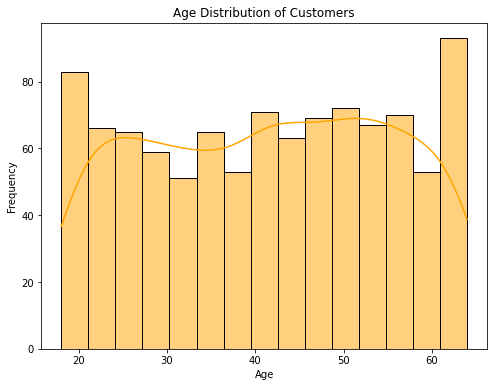

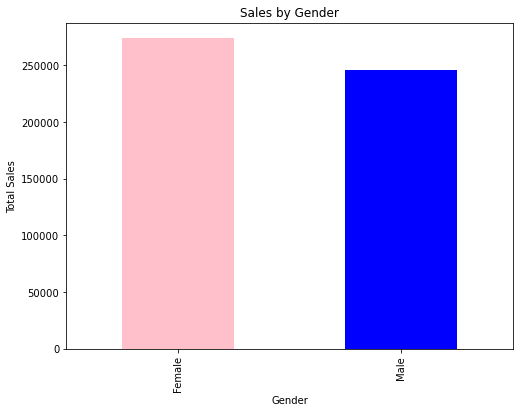

In [5]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=15, kde=True, color='orange')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender spending patterns
gender_sales = data.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(8, 6))
gender_sales.plot(kind='bar', color=['pink', 'blue'])
plt.title('Sales by Gender')
plt.ylabel('Total Sales')
plt.show()


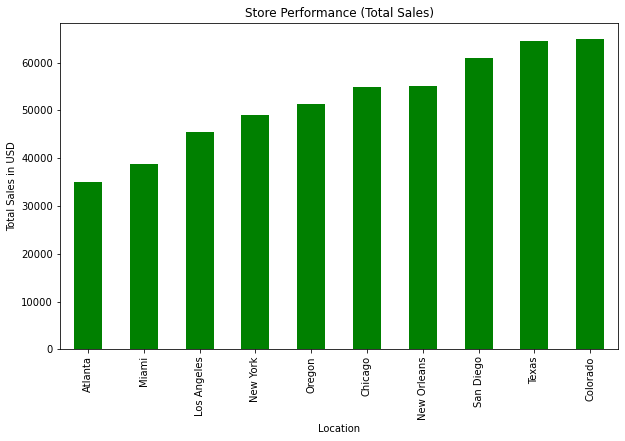

In [6]:
# Top and bottom performing stores
store_sales = data.groupby('Location')['Total Amount'].sum().sort_values()

# Bar plot
plt.figure(figsize=(10, 6))
store_sales.plot(kind='bar', color='green')
plt.title('Store Performance (Total Sales)')
plt.ylabel('Total Sales in USD')
plt.show()


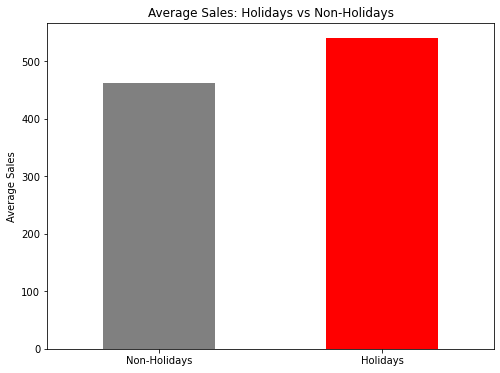

In [27]:
#Compare average sales on holidays vs. non-holidays

holiday_sales = data.groupby('is_holiday')['Total Amount'].mean()

plt.figure(figsize=(8, 6))
holiday_sales.plot(kind='bar', color=['gray', 'red'])
plt.title('Average Sales: Holidays vs Non-Holidays')
plt.xlabel('')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Non-Holidays', 'Holidays'], rotation=0)
plt.show()


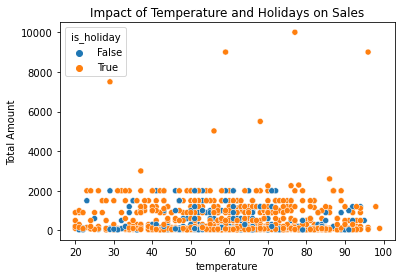

Holiday Sales Lift: 17.01%


In [9]:
#Correlation Analysis of Weather and Holidays on Sales
sns.scatterplot(data=data, x='temperature', y='Total Amount', hue='is_holiday')
plt.title('Impact of Temperature and Holidays on Sales')
plt.show()

#Holiday Sales Lift:
holiday_sales = data[data['is_holiday'] == True]['Total Amount'].mean()
non_holiday_sales = data[data['is_holiday'] == False]['Total Amount'].mean()
holiday_lift = ((holiday_sales - non_holiday_sales) / non_holiday_sales) * 100

print(f"Holiday Sales Lift: {holiday_lift:.2f}%")

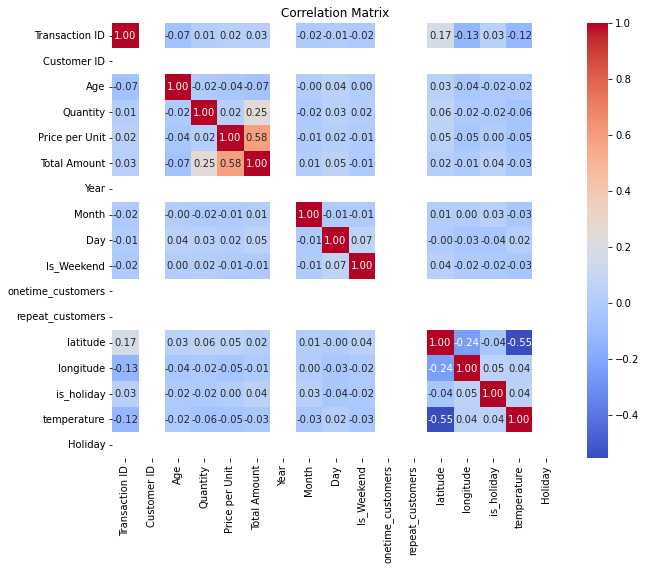

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#This coreelation matrix has a problem with all the binary and categorical columns interfering with a clean and informative matrix so we need to filter out those columns.

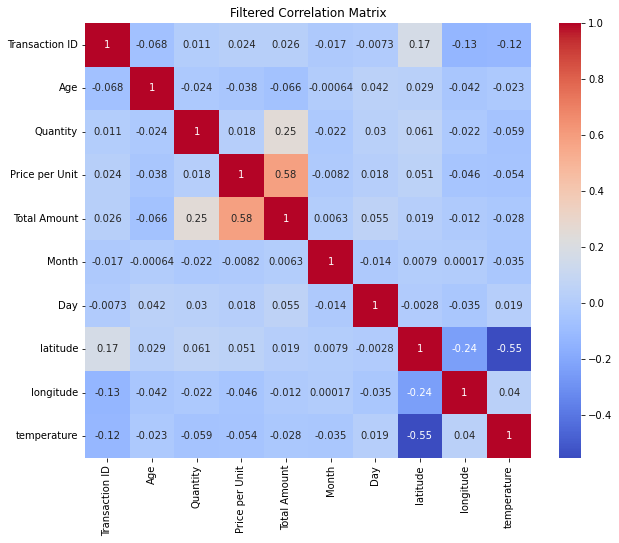

In [14]:
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()
relevant_cols = corr_matrix.columns[(corr_matrix.abs() > 0.1).any()]
filtered_data = numeric_data[relevant_cols]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm')
plt.title('Filtered Correlation Matrix')
plt.show()

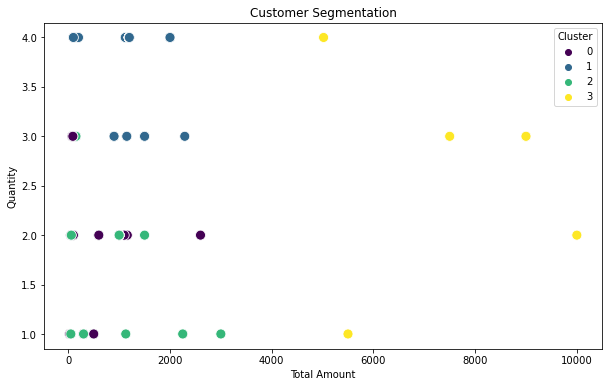

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering, scaleing the deatures and applying K-means clustering
clustering_features = data[['Total Amount', 'Quantity', 'Age']]
clustering_features = clustering_features.dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

n_clusters = 4  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustering_features['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_features['Total Amount'],
    y=clustering_features['Quantity'],
    hue=clustering_features['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Segmentation')
plt.xlabel('Total Amount')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()


In [17]:
import statsmodels.api as sm

# Prepare data for regression
X = pd.get_dummies(data[['Quantity', 'Age', 'Product Category']], drop_first=True)
y = data['Total Amount']


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Amount   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     18.34
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           1.51e-14
Time:                        15:05:40   Log-Likelihood:                -8087.6
No. Observations:                1000   AIC:                         1.619e+04
Df Residuals:                     995   BIC:                         1.621e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\kotsu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
# Define predictors and target variable
data['is_holiday'] = data['is_holiday'].astype(int)

X = data[['temperature', 'is_holiday']]
y = data['Total Amount']


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Amount   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.326
Date:                Sat, 18 Jan 2025   Prob (F-statistic):              0.266
Time:                        15:10:10   Log-Likelihood:                -8121.8
No. Observations:                1000   AIC:                         1.625e+04
Df Residuals:                     997   BIC:                         1.626e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         544.3233    101.783      5.348      

C:\Users\kotsu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\kotsu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\kotsu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kotsu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


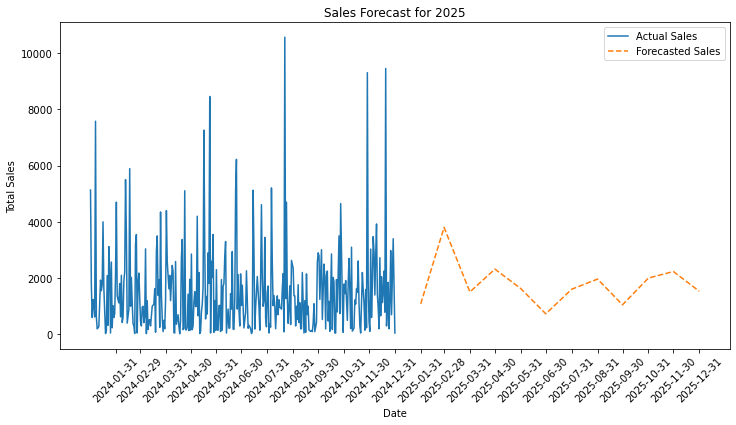

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

sales_time_series = data.groupby('Date')['Total Amount'].sum() # Aggregating sales by date

sales_time_series = sales_time_series.sort_index() #  Date is the index of the time series

model = ExponentialSmoothing(sales_time_series, seasonal='add', seasonal_periods=12).fit()

forecast = model.forecast(steps=12) # Forecast next 12 periods (2025)
forecast_dates = pd.date_range(start=sales_time_series.index[-1], periods=13, freq='M')[1:] # Generate a date range for the forecasted values

# Plot actual vs forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(sales_time_series, label='Actual Sales')
plt.plot(forecast_dates, forecast, label='Forecasted Sales', linestyle='--')
plt.title('Sales Forecast for 2025')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(pd.date_range(start=sales_time_series.index[0], end=forecast_dates[-1], freq='M'), rotation=45)
plt.legend()
plt.show()